# **Regressão Linear: Estudo de Caso com o Dataset Iris** 

---

**Carregando o Dataset Iris** 

In [10]:
from sklearn.datasets import load_iris
iris= load_iris()

# Armazenando os atributos na matriz X
X= iris.data

# Armazenando o vetor alvo in y
y= iris.target

**1ª Tarefa: Escreva um código em Python que confirme os dados da tabela abaixo.**

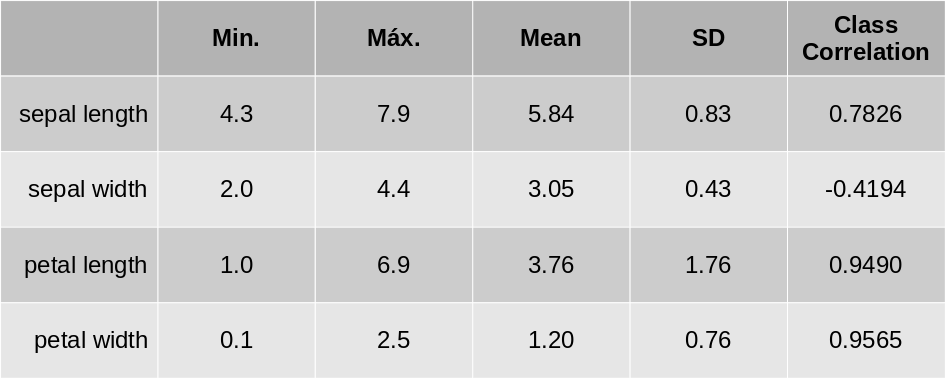

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

atributos = np.array(['sepal length', 'sepal width', 
                      'petal length', 'petal width'])

min_array = np.column_stack([np.min(X, axis=0)])
max_array = np.column_stack([np.max(X, axis=0)])
mean_array = np.column_stack([np.mean(X, axis=0)])
std_array = np.column_stack([np.std(X, axis=0)])

slope0, intercept0, r0, p0, std_err0 = stats.linregress(X[:,0], y)
slope1, intercept1, r1, p1, std_err1 = stats.linregress(X[:,1], y)
slope2, intercept2, r2, p2, std_err2 = stats.linregress(X[:,2], y)
slope3, intercept3, r3, p3, std_err3 = stats.linregress(X[:,3], y)

correlation_array = np.array([r0, r1, r2, r3])
correlation_array = np.column_stack([correlation_array])

data = np.concatenate((min_array, max_array, mean_array, std_array, correlation_array), axis=1)

df = pd.DataFrame(data, index=atributos, columns=['min', 'max', 'mean', 'std', 'class correlation'])
print(df)


              min  max      mean       std  class correlation
sepal length  4.3  7.9  5.843333  0.825301           0.782561
sepal width   2.0  4.4  3.057333  0.434411          -0.426658
petal length  1.0  6.9  3.758000  1.759404           0.949035
petal width   0.1  2.5  1.199333  0.759693           0.956547


**2º Tarefa: Plot o gráfico de dispersão de cada variável independente X e cada variável dependente y. Trace a linha entre estas duas variáveis.**

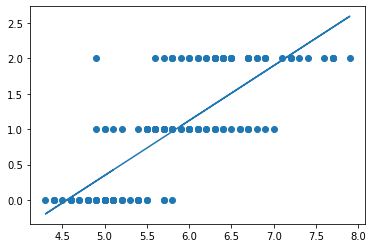

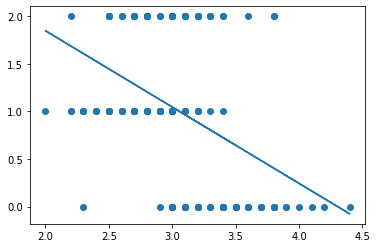

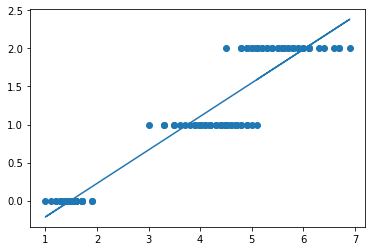

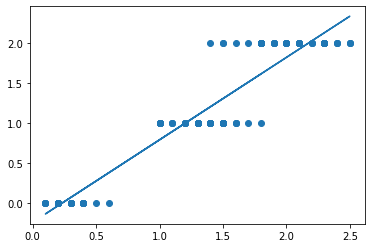

In [12]:
import matplotlib.pyplot as plt

def getY(x, slope, intercept):    
  return slope * x + intercept

model0 = list(getY(X[:,0], slope0, intercept0))
plt.scatter(X[:,0], y)
plt.plot(X[:,0], model0)
plt.show()

model1 = list(getY(X[:,1], slope1, intercept1))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], model1)
plt.show()

model2 = list(getY(X[:,2], slope2, intercept2))
plt.scatter(X[:,2], y)
plt.plot(X[:,2], model2)
plt.show()

model3 = list(getY(X[:,3], slope3, intercept3))
plt.scatter(X[:,3], y)
plt.plot(X[:,3], model3)
plt.show()

**3ª Tarefa: Adapte os exemplos anteriores para que os modelos sejam criados (treinados) com apenas 80% de cada classe. Utilize os outros 20% para testar o modelo. Compare e apresente os resultados de cada modelo. Emita sua opinião a respeito dos resultados obtidos.** 

In [13]:
from sklearn.model_selection import train_test_split # Ferramenta para dividir os dados
from sklearn.linear_model import  LinearRegression   # Classe para aplicar a regressão linear
from sklearn.metrics import r2_score # classe para calcular e ver a pontuação de nossas previsões

y = y.reshape(-1, 1)

X_train,X_test,y_train,y_test = train_test_split(X[:,0],y, test_size = 0.20) # Divisão dos dados.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lr = LinearRegression() # Criando o modelo linear

# ajustando o modelo nos dados de treinamento e tentando prever o X_test
model0 = lr.fit(X_train, y_train)
predictions = model0.predict(X_test)

score = r2_score(y_test, predictions)
print(score)

rmse = np.sqrt(((predictions - y_test)**2).mean())
print(rmse)



0.7604264049523193
0.42826031412351173


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X[:,1],y, test_size = 0.20) # Divisão dos dados.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lr = LinearRegression() # Criando o modelo linear

# ajustando o modelo nos dados de treinamento e tentando prever o X_test
model1 = lr.fit(X_train, y_train)
predictions = model0.predict(X_test)

score = r2_score(y_test, predictions)
print(score)

rmse = np.sqrt(((predictions - y_test)**2).mean())
print(rmse)

-5.294139723832603
2.0157422618388114


In [15]:
print(X[:,0])

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


O erro quadrático médio (RMSE) é uma medida frequentemente usada das diferenças entre os valores previstos por um modelo e os valores observados. O RMSE representa a raiz quadrada das diferenças entre os valores preditos e os valores observados ou a média quadrática dessas diferenças.

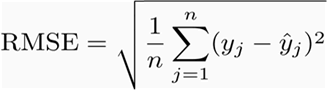